In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#   패키지 설치
#   pip install sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 학습
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

# 성능 조절
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

# 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import silhouette_score

# 경고 메세지 숨김
import warnings     
warnings.filterwarnings('ignore')

# (이미지)데이터 읽기
과일 - 사과 100개, 파인애플 100개, 바나나 100개

In [2]:
fruits = np.load('fruits_300.npy')

# 2차원(너비, 높이) -> 1차원(너비X높이)
fruits_2d = fruits.reshape(-1, 100*100)

fruits_2d.shape    # 2차원(샘플 개수, 이미지 높이X너비)

(300, 10000)

# PCA

In [3]:
pca = PCA(
    n_components=50  # 주성분 개수
    )
pca.fit(fruits_2d)

pca.components_.shape # 주성분 개수, 원본 데이터 특성 개수

(50, 10000)

In [6]:
fruits_pca = pca.transform(fruits_2d)

fruits_pca.shape  # 특성(10000개) -> 주성분(50)??

(300, 50)

In [7]:
fruits_inverse = pca.inverse_transform(fruits_pca)

fruits_inverse.shape  # 주성분(50) -> 특성(10000개)??

(300, 10000)

### 이미지

In [4]:
def draw_fruits(arr, ratio=1):    # arr: 3차원(샘플 개수, 너비, 높이)
    n = len(arr)    # 샘플 개수
    
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

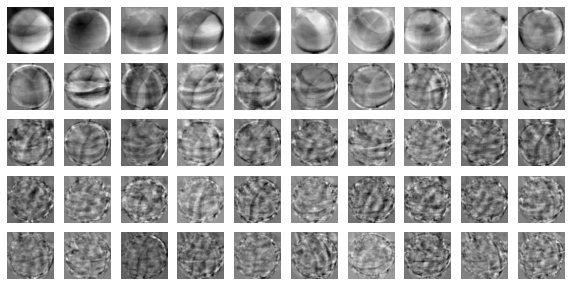

In [5]:
# 주성분
draw_fruits(pca.components_.reshape(-1, 100, 100))

### PCA -> 원본 데이터

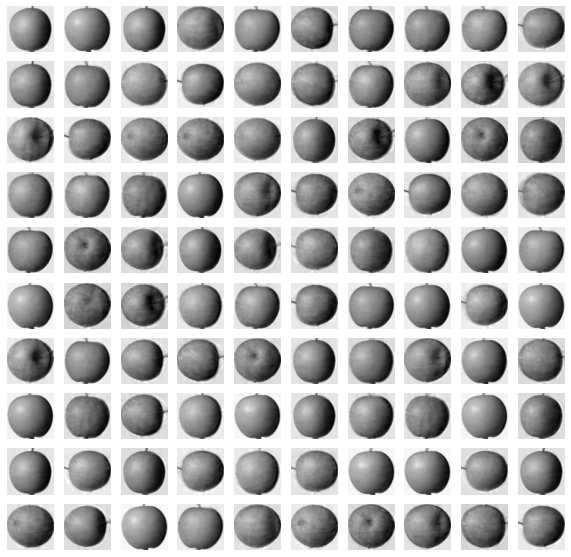

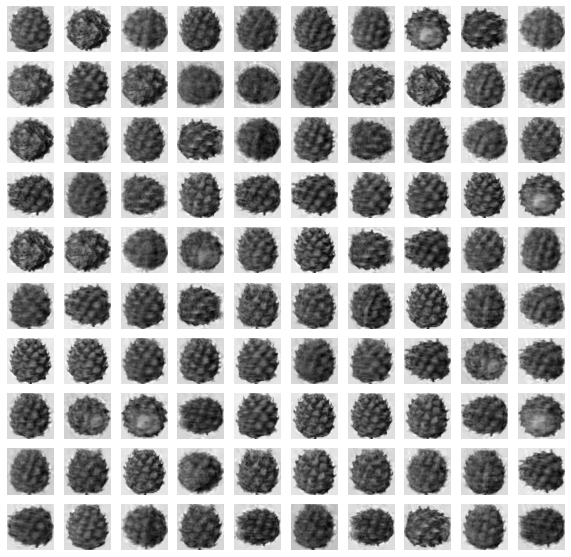

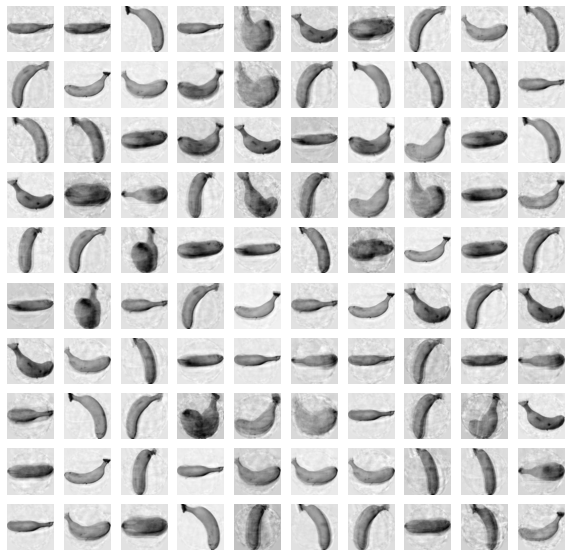

In [8]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

# 설명된 분산

In [9]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511203, 0.00486383, 0.00480347,
       0.00447836, 0.00437319, 0.00408034, 0.0038948 , 0.00372441,
       0.00359262, 0.0033144 , 0.00317831, 0.00304323, 0.00303776,
       0.00288923, 0.00275916, 0.00265005, 0.00255868, 0.00252114,
       0.00247295, 0.00239269, 0.00230904, 0.0022178 , 0.00216547,
       0.0021386 , 0.00196268, 0.00192604, 0.00190544, 0.00184537,
       0.0018266 , 0.00172517, 0.00169146, 0.00163447, 0.0016001 ])

In [10]:
np.sum(pca.explained_variance_ratio_)

0.9215698128841869

### 그래프

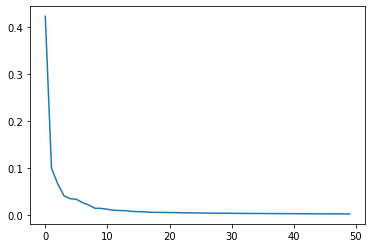

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 로지스틱 회귀 vs PCA

In [12]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [13]:
lr = LogisticRegression()

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))  # 훈련 시간

0.9966666666666667
1.6209793567657471


In [14]:
# PCA
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))  # 훈련 시간

1.0
0.030154943466186523


# PCA 2

In [15]:
pca = PCA(
    n_components=0.5  # 설명된 분산 비율
    )
pca.fit(fruits_2d)

pca.n_components_

2

### 원본 데이터 변환

In [16]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))  # 훈련 시간

0.9933333333333334
0.036686944961547854


# K-평균

In [18]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


### 이미지

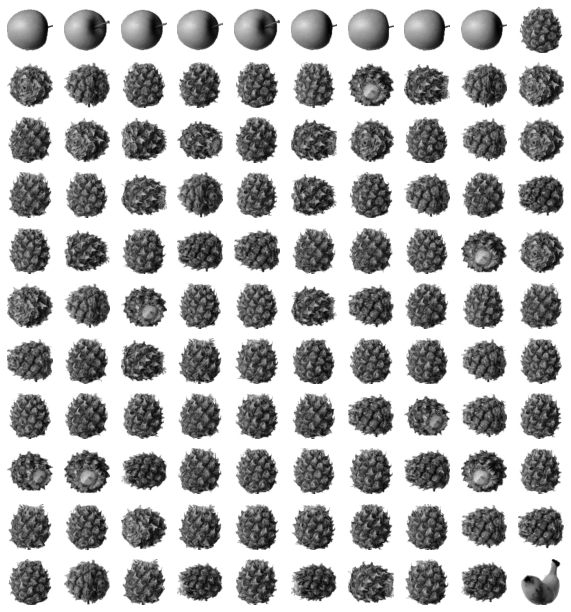

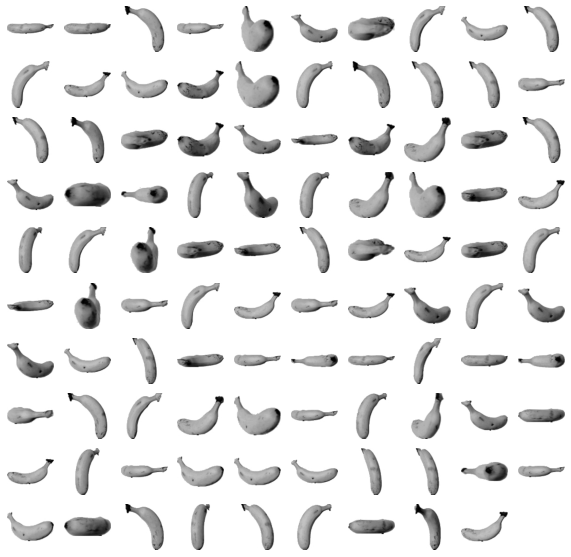

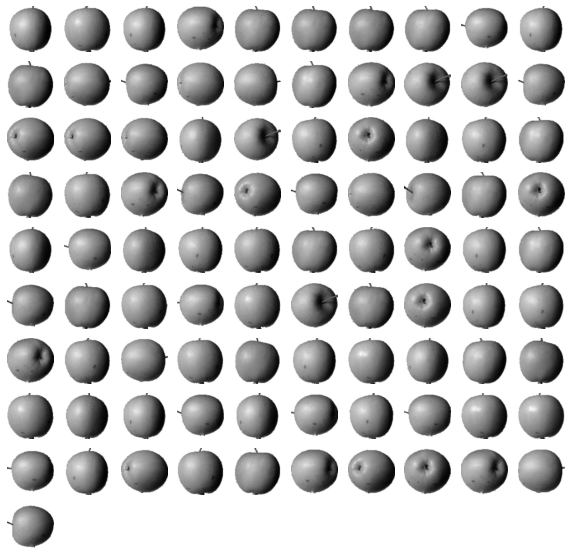

In [19]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

### 산점도

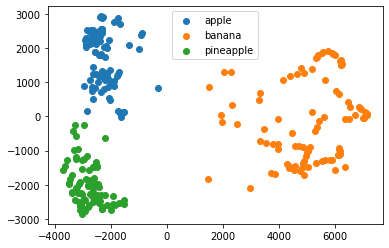

In [20]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()